#Import Libraries

In [ ]:
import pandas as pd
import seaborn as sns
from datetime import datetime
from plotly import graph_objs as go
import plotly.express as px
from dateutil.parser import parse

# Matplot
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter


%matplotlib inline

# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer

# Keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, Embedding, Flatten, Conv1D, MaxPooling1D, LSTM
from keras import utils
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

# nltk
import nltk
from nltk.corpus import stopwords
from  nltk.stem import SnowballStemmer

# Word2vec
import gensim

# Utility
import re
import numpy as np
import os
from collections import Counter
import logging
import time
import pickle
import itertools

# Set log
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

from sklearn.feature_extraction.text import CountVectorizer
from plotly.offline import iplot
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')


# Data Cleaning

In [ ]:
data_path = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vRDSCmpZy7fFJuWES_WJDC1cAT1udsjzvbfbBJ8O-i4e5QIQ4HRSR3ixvp-V-JTmJr-5Y-ucXDs_b0f/pub?gid=2078209872&single=true&output=csv'
df = pd.read_csv(data_path)
df.shape

(209, 23)

In [ ]:
df.head()

,Unnamed: 0,book_id,book_name,chapters.chapter_name,chapters.chapter_content,question,choices,answer,line,showContext,...,saved.question,saved.choices,saved.answer,saved.showContext,saved.heading_name,saved.type,chapters.keyphrase_saved_Question_count,chapters.example_question_saved_count,chapters.keyphrase_question_nonsaved_count,chapters.example_nonsaved_count
0,45437,121,Health and Human Development Units 3 and 4,c04 Variations In Health Status Population Groups,NaN,"Maternal tobacco, alcohol and drug use, and ma...","['Rural Areas', 'America', 'The United Nations...",Pregnancy,"Maternal tobacco, alcohol and drug use, and ma...","\nPage 141 Every person is, in part, a product...",...,NaN,NaN,NaN,NaN,NaN,NaN,31,27,985,154
1,37718,130,Business Studies Preliminary 7e,Marketing strategies,NaN,Publicity and _____________ _____________ ...,"['Global marketing', 'transnational corporatio...",Global Branding,Publicity and global branding Global branding ...,content not found,...,NaN,NaN,NaN,NaN,NaN,NaN,35,34,1038,230
2,3195,120,Accounts,Chapter 3: The Accounting Information System,NaN,A debit of $395 to _____________ was posted ...,"['The General Ledger', 'Service Revenue', 'Tem...",Advertising Expense,A debit of $395 to Advertising Expense was pos...,content not found,...,NaN,NaN,NaN,NaN,NaN,NaN,58,22,1060,0
3,17640,120,Accounts,Chapter 14 Managerial Accounting,NaN,Here are some of the costs that your snowboard...,"['Illinois', 'Wisconsin', 'State Of Illinois',...",Terrain,Here are some of the costs that your snowboard...,\nTo improve your understanding of cost concep...,...,NaN,NaN,NaN,NaN,NaN,NaN,46,30,727,5
4,28350,120,Accounts,Chapter 24 Standard Costs and Balanced Scorecard,NaN,What is a possible scenario that would provide...,"['Computation Of Cost Of Delivery Truck', 'Whe...",Unfavorable,What is a possible scenario that would provide...,content not found,...,NaN,NaN,NaN,NaN,NaN,NaN,41,27,1586,13


In [ ]:
df.line[0]

'Maternal tobacco, alcohol and drug use, and maternal nutrition and exposure to certain chemicals, bacteria and viruses during pregnancy, can all have significant impacts on the individual after birth and into adulthood.'

In [ ]:
df.question[0]

'Maternal tobacco, alcohol and drug use, and maternal nutrition and exposure to certain chemicals, bacteria and viruses during  _____________ , can all have significant impacts on the individual after birth and into adulthood.'

# Exploratory Data Anslysis (EDA)

## EDA - Lu Liu & Anqiao Mai


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 23 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Unnamed: 0                                  209 non-null    int64  
 1   book_id                                     209 non-null    int64  
 2   book_name                                   209 non-null    object 
 3   chapters.chapter_name                       209 non-null    object 
 4   chapters.chapter_content                    0 non-null      float64
 5   question                                    209 non-null    object 
 6   choices                                     209 non-null    object 
 7   answer                                      208 non-null    object 
 8   line                                        209 non-null    object 
 9   showContext                                 209 non-null    object 
 10  heading_name  

In [ ]:
a = df['book_name'].value_counts()
a=pd.DataFrame(a)
a

,book_name
Accounts,77
principle of life,66
Health and Human Development Units 3 and 4,26
Business Studies Preliminary 7e,24
Hockenbury Psychology,16


Text(0, 0.5, 'Frequency')

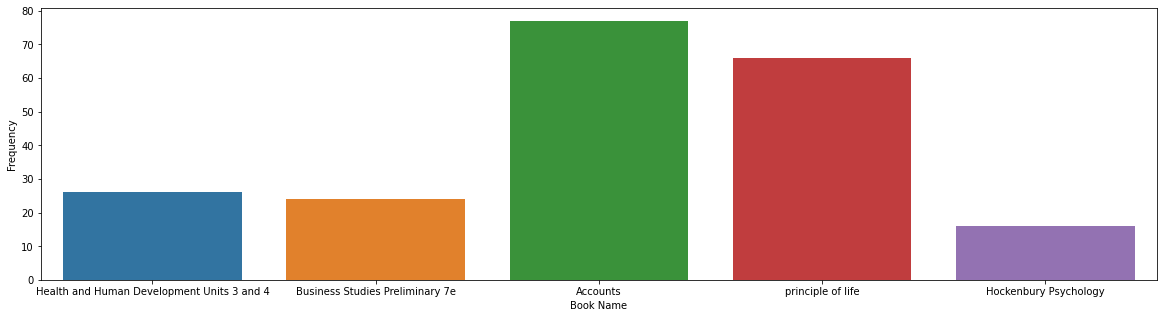

In [ ]:
fig = plt.figure(figsize = (20, 5))
sns.countplot(x='book_name',data=df)
plt.xlabel('Book Name')
plt.ylabel('Frequency')

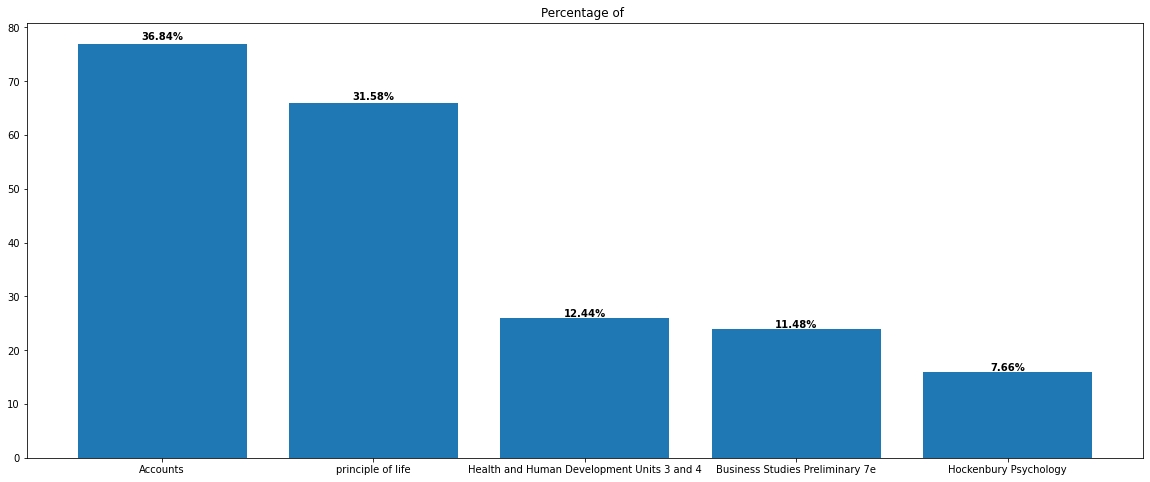

In [ ]:
total_freq = a.book_name.sum()
# compute percentage of each format
percentage = []
for i in range(a.shape[0]):
    pct = (a.book_name[i] / total_freq) * 100
    percentage.append(round(pct,2))
a['Percentage'] = percentage
 
# depict illustration
plt.figure(figsize=(20,8))
graph = plt.bar(a.index,a.book_name)
plt.title('Percentage of ')
 
i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(a.Percentage[i])+'%',
             ha='center',
             weight='bold')
    i+=1
plt.show()

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

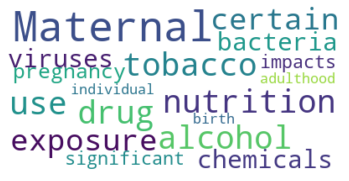

In [ ]:
text = df.line[0]

# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
variables = ['chapters.keyphrase_saved_Question_count','chapters.example_question_saved_count','chapters.keyphrase_question_nonsaved_count','chapters.example_nonsaved_count']
x = df.loc[:, variables].values
y = df.loc[:,['book_name']].values
x = StandardScaler().fit_transform(x)
x = pd.DataFrame(x)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
x_pca = pca.fit_transform(x)
x_pca = pd.DataFrame(x_pca)
x_pca.head()

,0,1,2,3
0,0.221463,-0.170424,0.731252,-0.672404
1,1.020161,-0.031095,0.660456,-1.086047
2,-0.867221,1.300005,-0.369971,0.380256
3,-0.720024,0.281197,-0.277677,0.636409
4,-0.768189,1.362943,1.164543,0.249650


In [ ]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.41599891, 0.30805871, 0.19195164, 0.08399074])

In [ ]:
x_pca['book_name']=y
x_pca.columns = ['PC1','PC2','PC3','PC4','book_name']
x_pca.head()

,PC1,PC2,PC3,PC4,book_name
0,0.221463,-0.170424,0.731252,-0.672404,Health and Human Development Units 3 and 4
1,1.020161,-0.031095,0.660456,-1.086047,Business Studies Preliminary 7e
2,-0.867221,1.300005,-0.369971,0.380256,Accounts
3,-0.720024,0.281197,-0.277677,0.636409,Accounts
4,-0.768189,1.362943,1.164543,0.249650,Accounts


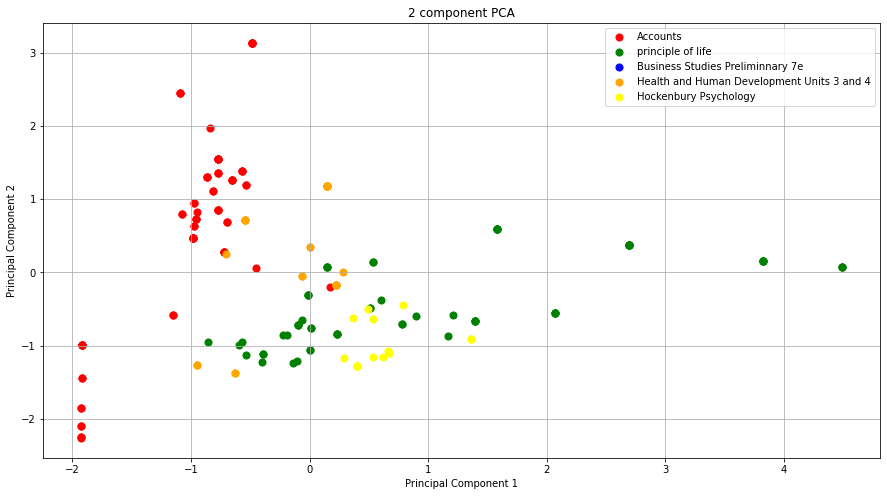

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1') 
ax.set_ylabel('Principal Component 2') 
ax.set_title('2 component PCA') 
book_names = ['Accounts','principle of life','Business Studies Preliminnary 7e','Health and Human Development Units 3 and 4','Hockenbury Psychology']
colors = ['r','g','b','orange','yellow']
for book_name, color in zip(book_names,colors):
 indicesToKeep = x_pca['book_name'] == book_name
 ax.scatter(x_pca.loc[indicesToKeep, 'PC1']
 , x_pca.loc[indicesToKeep, 'PC2']
 , c = color
 , s = 50)
ax.legend(book_names)
ax.grid()

In [ ]:
tsne = TSNE(n_components=2, verbose=1, random_state=123, init='pca', learning_rate='auto')
z = tsne.fit_transform(x) 

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 209 samples in 0.001s...
[t-SNE] Computed neighbors for 209 samples in 0.005s...
[t-SNE] Computed conditional probabilities for sample 209 / 209
[t-SNE] Mean sigma: 0.722355


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning:

The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.



[t-SNE] KL divergence after 250 iterations with early exaggeration: 48.939663
[t-SNE] KL divergence after 1000 iterations: -0.800068


[Text(0.5, 1.0, 'T-SNE projection')]

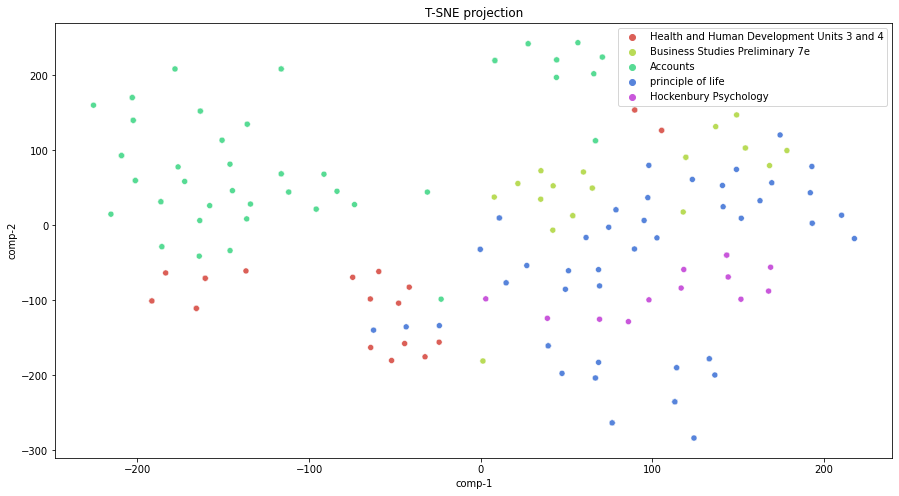

In [ ]:
df['y'] = df.book_name
df['comp-1'] = z[:,0]
df['comp-2'] = z[:,1]
fig = plt.figure(figsize=(15,8))

sns.scatterplot(x='comp-1', y='comp-2', hue=df.y.tolist(),
                palette=sns.color_palette('hls', 5),
                data=df).set(title='T-SNE projection') 

##EDA - Danni


In [ ]:
b = df['saved'].value_counts()
b=pd.DataFrame(b)
b

,saved
False,188


In [ ]:
#df.drop('Unnamed: 0', axis=1, inplace=True)

df = df[~df['line'].isnull()]

def preprocess(ReviewText):
    ReviewText = ReviewText.str.replace("(<br/>)", "", regex=True)
    ReviewText = ReviewText.str.replace('(<a).*(>).*(</a>)', '',regex=True)
    ReviewText = ReviewText.str.replace('(&amp)', '',regex=True)
    ReviewText = ReviewText.str.replace('(&gt)', '',regex=True)
    ReviewText = ReviewText.str.replace('(&lt)', '',regex=True)
    ReviewText = ReviewText.str.replace('(\xa0)', ' ',regex=True)  
    return ReviewText
df['line'] = preprocess(df['line'])

df['line_len'] = df['line'].astype(str).apply(len)
df['word_count'] = df['line'].apply(lambda x: len(str(x).split()))

(array([ 6.,  6.,  4.,  7.,  6., 12., 17.,  8., 14.,  8., 12.,  6.,  5.,
        15.,  6.,  9., 11.,  7., 11.,  3.,  6.,  6.,  6.,  4.,  0.,  2.,
         4.,  0.,  0.,  2.,  0.,  2.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 40.  ,  48.04,  56.08,  64.12,  72.16,  80.2 ,  88.24,  96.28,
        104.32, 112.36, 120.4 , 128.44, 136.48, 144.52, 152.56, 160.6 ,
        168.64, 176.68, 184.72, 192.76, 200.8 , 208.84, 216.88, 224.92,
        232.96, 241.  , 249.04, 257.08, 265.12, 273.16, 281.2 , 289.24,
        297.28, 305.32, 313.36, 321.4 , 329.44, 337.48, 345.52, 353.56,
        361.6 , 369.64, 377.68, 385.72, 393.76, 401.8 , 409.84, 417.88,
        425.92, 433.96, 442.  ]),
 <a list of 50 Patch objects>)

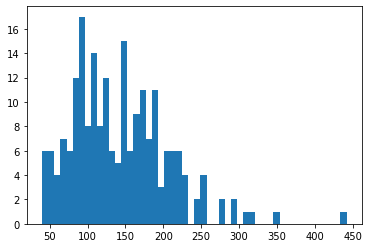

In [ ]:
# The distribution text lengths
plt.hist(df.line_len,bins=50)

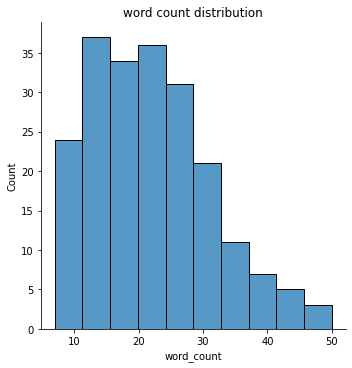

In [ ]:
# The distribution of word count
sns.displot(df, x="word_count").set(title='word count distribution')

(array([ 6.,  4.,  7.,  1.,  6.,  7.,  6.,  0., 13., 11., 15.,  8.,  4.,
         7.,  0.,  5., 11.,  8.,  8.,  4., 12.,  0.,  5.,  7.,  7.,  6.,
         6.,  3.,  0.,  6.,  3.,  0.,  1.,  4.,  3.,  0.,  0.,  1.,  4.,
         2.,  3.,  1.,  0.,  1.,  0.,  2.,  0.,  0.,  0.,  1.]),
 array([ 7.  ,  7.86,  8.72,  9.58, 10.44, 11.3 , 12.16, 13.02, 13.88,
        14.74, 15.6 , 16.46, 17.32, 18.18, 19.04, 19.9 , 20.76, 21.62,
        22.48, 23.34, 24.2 , 25.06, 25.92, 26.78, 27.64, 28.5 , 29.36,
        30.22, 31.08, 31.94, 32.8 , 33.66, 34.52, 35.38, 36.24, 37.1 ,
        37.96, 38.82, 39.68, 40.54, 41.4 , 42.26, 43.12, 43.98, 44.84,
        45.7 , 46.56, 47.42, 48.28, 49.14, 50.  ]),
 <a list of 50 Patch objects>)

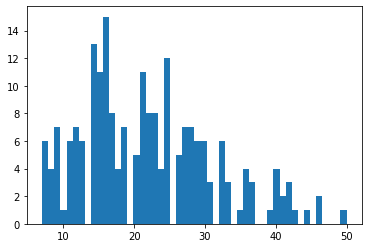

In [ ]:
plt.hist(df.word_count,bins=50)

In [ ]:
#Top unigrams after removing stop words

def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(df['line'], 20)
for word, freq in common_words:
    print(word, freq)
df4 = pd.DataFrame(common_words, columns = ['line' , 'count'])
df4=df4.groupby('line').sum()['count'].sort_values(ascending=False)
df4=pd.DataFrame(df4)

accounts receivable 4
short term 4
cash flow 4
epub type 4
type keyword 4
keyword class 4
class keyword 4
000 accounts 4
human resource 4
human development 4
000 cash 3
income statement 3
income taxes 3
unit cost 3
cash disbursements 3
common stock 3
30 000 3
cost goods 3
figure shows 3
cash flows 3


In [ ]:
df4=df4.reset_index()
df4

,line,count
0,000 accounts,4
1,class keyword,4
2,type keyword,4
3,short term,4
4,keyword class,4
5,human resource,4
6,human development,4
7,epub type,4
8,cash flow,4
9,accounts receivable,4


<Figure size 1080x576 with 0 Axes>

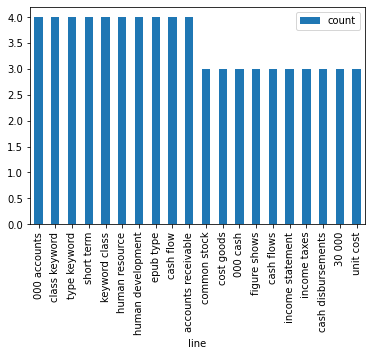

In [ ]:
fig = plt.figure(figsize=(15,8))
ax = df4.plot.bar(x='line', y='count')

In [ ]:
'''
The distribution text lengths
sns.displot(df, x="line_len").set(title='text length distribution')
df.drop('Unnamed: 0', axis=1, inplace=True)

df = df[~df['line'].isnull()]

def preprocess(ReviewText):
    ReviewText = ReviewText.str.replace("(<br/>)", "")
    ReviewText = ReviewText.str.replace('(<a).*(>).*(</a>)', '')
    ReviewText = ReviewText.str.replace('(&amp)', '')
    ReviewText = ReviewText.str.replace('(&gt)', '')
    ReviewText = ReviewText.str.replace('(&lt)', '')
    ReviewText = ReviewText.str.replace('(\xa0)', ' ')  
    return ReviewText
df['line'] = preprocess(df['line'])

df['line_len'] = df['line'].astype(str).apply(len)
df['word_count'] = df['line'].apply(lambda x: len(str(x).split()))
manufacturing overhead 8
net income 7
long term 5
health wellbeing 5
fixed costs 5
accounts payable 5
000 cash 5
common stock 5
raw materials 4
contribution margin 4
balance sheet 4
work process 4
trial balance 4
net cash 4
cash provided 4
provided operating 4
operating activities 4
mental health 3
present value 3
income net 3
'''

'\nThe distribution text lengths\nsns.displot(df, x="line_len").set(title=\'text length distribution\')\ndf.drop(\'Unnamed: 0\', axis=1, inplace=True)\n\ndf = df[~df[\'line\'].isnull()]\n\ndef preprocess(ReviewText):\n    ReviewText = ReviewText.str.replace("(<br/>)", "")\n    ReviewText = ReviewText.str.replace(\'(<a).*(>).*(</a>)\', \'\')\n    ReviewText = ReviewText.str.replace(\'(&amp)\', \'\')\n    ReviewText = ReviewText.str.replace(\'(&gt)\', \'\')\n    ReviewText = ReviewText.str.replace(\'(&lt)\', \'\')\n    ReviewText = ReviewText.str.replace(\'(\xa0)\', \' \')  \n    return ReviewText\ndf[\'line\'] = preprocess(df[\'line\'])\n\ndf[\'line_len\'] = df[\'line\'].astype(str).apply(len)\ndf[\'word_count\'] = df[\'line\'].apply(lambda x: len(str(x).split()))\nmanufacturing overhead 8\nnet income 7\nlong term 5\nhealth wellbeing 5\nfixed costs 5\naccounts payable 5\n000 cash 5\ncommon stock 5\nraw materials 4\ncontribution margin 4\nbalance sheet 4\nwork process 4\ntrial balance 4\

## EDA - Christina Jin

In [ ]:
'''
pip install \
   pandas matplotlib numpy \
   nltk seaborn sklearn gensim pyldavis \
   wordcloud textblob spacy textstat
'''

'\npip install    pandas matplotlib numpy    nltk seaborn sklearn gensim pyldavis    wordcloud textblob spacy textstat\n'

### 1. Text Statistics Analysis

> **1.1  Types of Questions**

In [ ]:
q_type = pd.DataFrame(df['type'].value_counts())
q_type

,type
Keyphrase,174
Example,35


Text(0.5, 1.0, 'Distribution of Question Types \n')

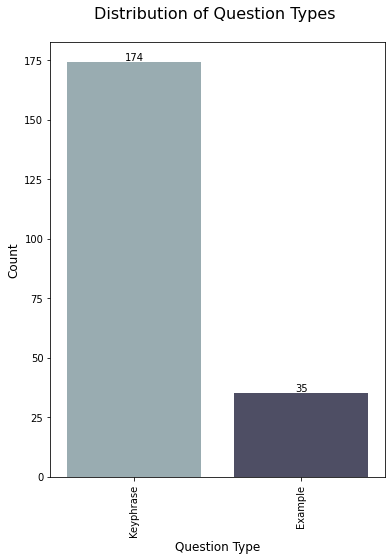

In [ ]:
fig = plt.figure(figsize = (6,8))

graph = sns.countplot(x='type',data=df,palette = "bone_r")
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 1.1,height ,ha="center")
plt.xlabel('Question Type', size=12)
plt.ylabel('Count', size = 12)
plt.title('Distribution of Question Types \n', size=16)

> **1.2 Question Content Length - Number of Words**

Text(0.5, 1.0, 'Qusetion Word Count Distribution \n')

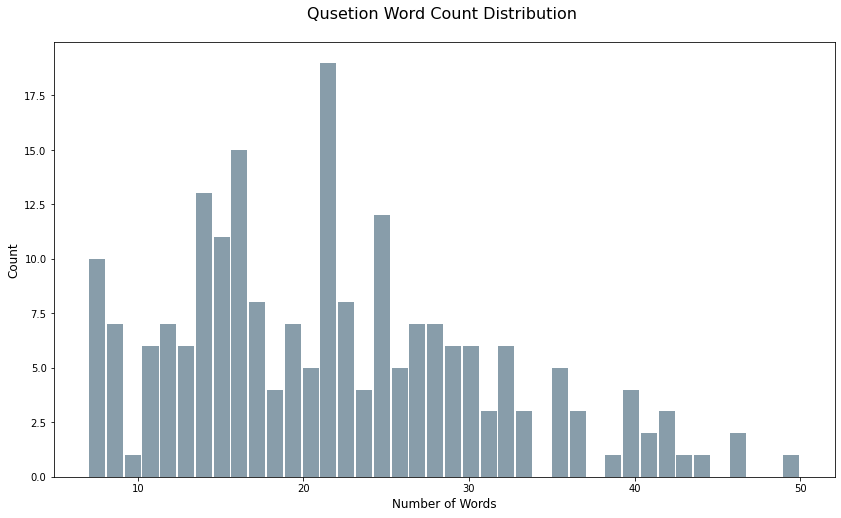

In [ ]:
def word_number_plot(text):
    text.str.split().\
        map(lambda x: len(x)).\
        hist(grid=False, alpha = 0.75, bins=40, rwidth=0.9,
             color='#607c8e',figsize=(14,8))

word_number_plot(df['line'])
plt.xlabel('Number of Words', size=12)
plt.ylabel('Count', size = 12)
plt.title('Qusetion Word Count Distribution \n', size=16)

> **Text Preprocessing + Identify and Remove Stopwords**

In [ ]:
# load packages
import nltk
nltk.download('stopwords')
nltk.download('punkt')
stop=set(stopwords.words('english'))
from nltk import word_tokenize
import string
from nltk.corpus import stopwords
from collections import  Counter
from collections import defaultdict

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
# remove punctuation
def remove_punc(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

df['cleanedLine'] = df['line'].apply(remove_punc)

In [ ]:
# further pre-processing
def preprocess(text):
    text = text.str.replace('(&amp)', '',regex=True)
    text = text.str.replace('(&gt)', '',regex=True)    
    text = text.str.replace("(<br/>)", "",regex=True)
    text = text.str.replace('(<a).*(>).*(</a>)', '',regex=True)
    text = text.str.replace('(&lt)', '', regex=True)
    text = text.str.replace('(\xa0)', ' ', regex=True)  
    return text

df['cleanedLine'] = preprocess(df['cleanedLine'])

In [ ]:
# lower case
df['cleanedLine'] =df['cleanedLine'].apply(lambda x:str(x).lower())

In [ ]:
# create corpus of stopwords
corpus=[]
line = df['cleanedLine'].str.split()
line = line.values.tolist()
corpus=[word for i in line for word in i]

from collections import defaultdict
dic = defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

In [ ]:
# split into tokens
df['processedLine'] =df['cleanedLine'].apply(lambda x:word_tokenize(x))

In [ ]:
# inspect words with top occurency

top = Counter([item for sublist in df['processedLine'] for item in sublist])
top_temp = pd.DataFrame(top.most_common(15))
top_temp.columns = ['top_words','count']
top_temp.style.background_gradient(cmap='bone_r')

,top_words,count
0,the,262
1,and,152
2,of,148
3,in,108
4,a,87
5,to,83
6,is,53
7,for,50
8,as,43
9,are,42


In [ ]:
# remove stopwords
def remove_stopword(context):
    return [word for word in context if word not in stopwords.words('english')]

df['processedLine'] = df['processedLine'].apply(lambda x:remove_stopword(x))

> **1.3 Most Frequent Words (Non-stopwords)**

In [ ]:
# inspect words with top occurency AFTER removing stopwords

top = Counter([item for sublist in df['processedLine'] for item in sublist])
top_temp = pd.DataFrame(top.most_common(20))
top_temp.columns = ['top_words','count']
top_temp.style.background_gradient(cmap='crest')

,top_words,count
0,cash,26
1,figure,19
2,cost,14
3,costs,12
4,two,12
5,accounts,12
6,system,12
7,’,11
8,expense,10
9,process,10


Text(0.5, 1.0, 'Most Frequent Words Among Question \n')

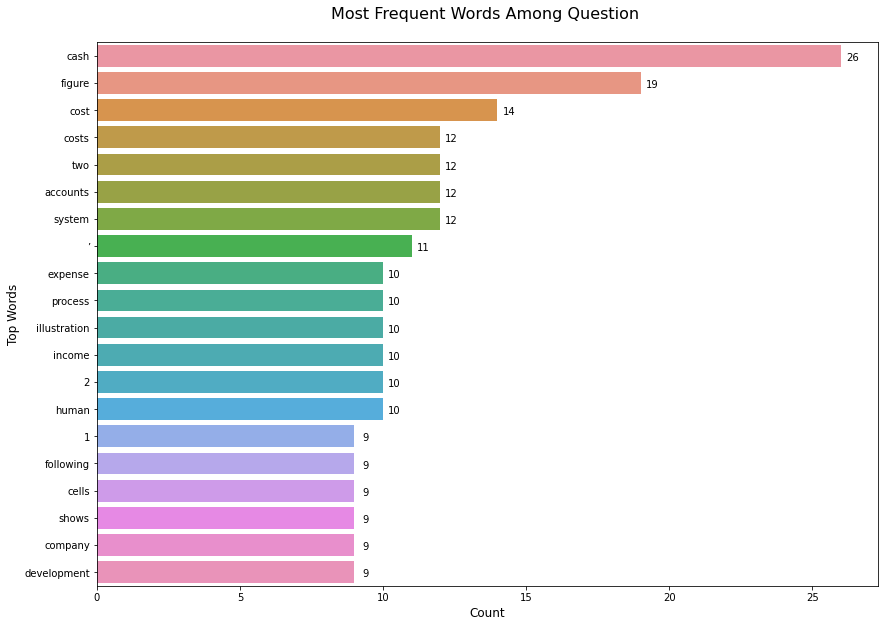

In [ ]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 14,10
ax = sns.barplot(x="count", y="top_words", data=top_temp) #palette="ch:.25_r", edgecolor=".6"


def show_value_on_bars(ax, space=0.4):
        for p in ax.patches:
            _x = p.get_x() + p.get_width() + float(space)
            _y = p.get_y() + p.get_height() / 1.4
            value = int(p.get_width())
            ax.text(_x, _y, value, ha="center")

show_value_on_bars(ax, 0.4)

plt.xlabel('Count', size=12)
plt.ylabel('Top Words', size = 12)
plt.title('Most Frequent Words Among Question \n', size=16)

### 2. N-gram Exploration

In [ ]:
# load packages
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
from collections import  Counter

In [ ]:
def plot_top_ngrams(text, n=2, pal="ch:s=-.2,r=.6_r"):
    stop=set(stopwords.words('english'))

    line = text.str.split()
    line = line.values.tolist()
    corpus=[word for i in line for word in i if word not in stop ]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_ngrams=_get_top_ngram(text,n)[:10]
    x,y=map(list,zip(*top_ngrams))
    sns.barplot(x=y,y=x,palette=pal)

Text(0.5, 1.0, 'Most Frequent Trigrams Among Question \n')

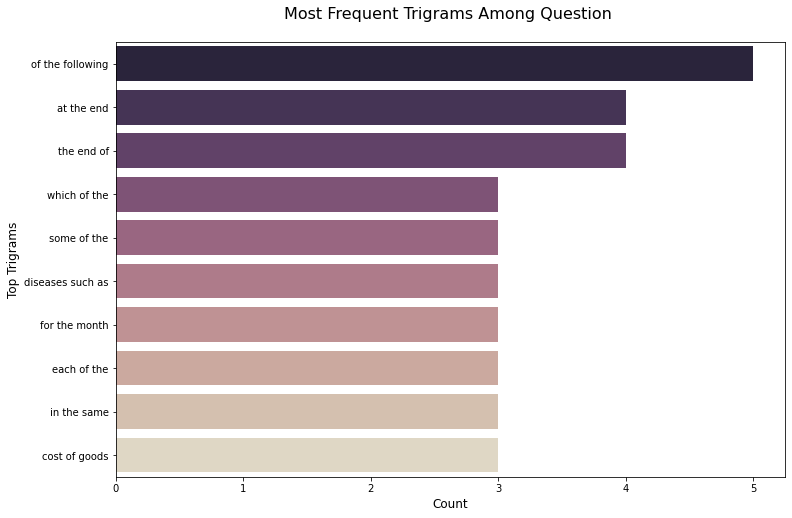

In [ ]:
# plot top trigrams

rcParams['figure.figsize'] = 12,8
top_trigram = plot_top_ngrams(df['cleanedLine'],3)

def show_value_on_bars(top_trigram, space=0.4):
        for p in ax.patches:
            _x = p.get_x() + p.get_width() + float(space)
            _y = p.get_y() + p.get_height() / 1.4
            value = int(p.get_width())
            ax.text(_x, _y, value, ha="center")

show_value_on_bars(ax, 0.4)

plt.xlabel('Count', size=12)
plt.ylabel('Top Trigrams', size = 12)
plt.title('Most Frequent Trigrams Among Question \n', size=16)

####ner

In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [ ]:
def ner(text):
    doc=nlp(text)
    return [X.label_ for X in doc.ents]

ent=df['cleanedLine'].\
    apply(lambda x : ner(x))
ent=[x for sub in ent for x in sub]

counter=Counter(ent)
count=counter.most_common()

In [ ]:
'''
x,y=map(list,zip(*count))
sns.barplot(x=y,y=x)
'''

'\nx,y=map(list,zip(*count))\nsns.barplot(x=y,y=x)\n'

##EDA-Rajvi


Text(0.5, 0, 'Chapter name')

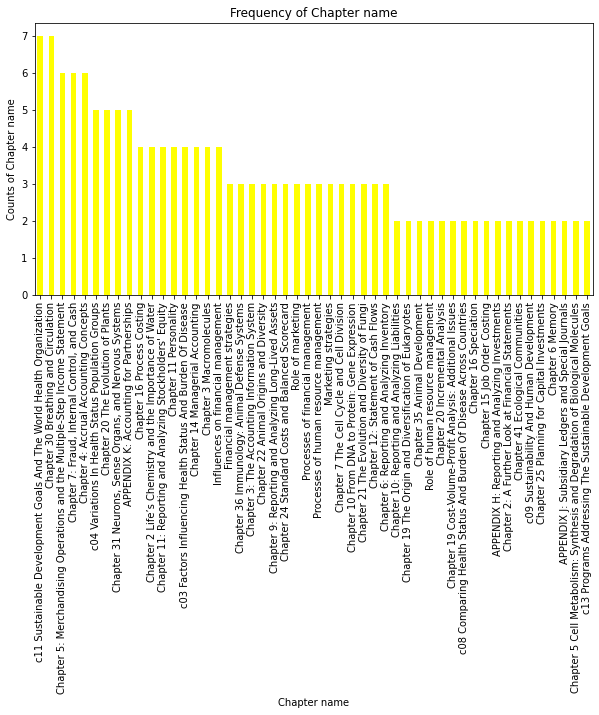

In [ ]:
df['chapters.chapter_name'].value_counts().nlargest(50).plot(kind='bar',color= 'yellow',figsize=(10,5))
plt.title('Frequency of Chapter name')
plt.ylabel('Counts of Chapter name')
plt.xlabel('Chapter name')

#CNN_Model_Danni


##pre

In [ ]:
data=df[['line','saved']]

In [ ]:
data["saved"] = data["saved"]*1

In [ ]:
data=data.fillna("1")

In [ ]:
data.saved = np.asarray(data.saved).astype('float32')

In [ ]:
data

,line,saved
0,"Maternal tobacco, alcohol and drug use, and ma...",0.0
1,Publicity and global branding Global branding ...,0.0
2,A debit of $395 to Advertising Expense was pos...,0.0
3,Here are some of the costs that your snowboard...,0.0
4,What is a possible scenario that would provide...,0.0
...,...,...
204,Animation 10.1 Transcription PoL3e.com/a10.1 ...,1.0
205,Growth of a plant cell is restricted by the ce...,1.0
206,"<p><img src=""http://d1q3p76q2qt5dz.cloudfront....",1.0
207,"For example, Eysenck proposed that an introver...",1.0


##model

In [ ]:
#split train and test
from sklearn.model_selection import train_test_split
review = data['line'].values
label = data['saved'].values
review_train, review_test, label_train, label_test = train_test_split(review, label, test_size=0.25, random_state=1000) 


In [ ]:
#Vectorizing the split data
from sklearn.feature_extraction.text import CountVectorizer
review_vectorizer = CountVectorizer()
review_vectorizer.fit(review_train)
Xlr_train = review_vectorizer.transform(review_train)
Xlr_test  = review_vectorizer.transform(review_test)
Xlr_train 

<156x1439 sparse matrix of type '<class 'numpy.int64'>'
	with 2940 stored elements in Compressed Sparse Row format>

In [ ]:
#word embeddings for the model
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(review_train)
Xcnn_train = tokenizer.texts_to_sequences(review_train)
Xcnn_test = tokenizer.texts_to_sequences(review_test)
vocab_size = len(tokenizer.word_index) + 1  
print(review_train[1])
print(Xcnn_train[1]) 

FIGURE 14.6 Development Reveals the Evolutionary Relationship between Sea Squirts and Vertebrates All chordates—a taxonomic group that includes sea squirts and frogs—have a notochord at some stage of their development.
[19, 496, 89, 34, 497, 1, 246, 119, 44, 247, 248, 2, 164, 27, 498, 499, 249, 9, 250, 247, 248, 2, 500, 5, 501, 21, 28, 502, 3, 35, 34]


In [ ]:
#provide a mexlen parameter
from keras.preprocessing.sequence import pad_sequences
maxlen = 100
Xcnn_train = pad_sequences(Xcnn_train, padding='post', maxlen=maxlen)
Xcnn_test = pad_sequences(Xcnn_test, padding='post', maxlen=maxlen)
print(Xcnn_train[0, :])

[486   2 487  15 488 489  87  70  24 117  13 163 241   9  70 242   2 490
   1  87 163 491  88 163 492 493 118 494  71   1  87  12 243  13 244   2
 495  72   2 245   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]


In [ ]:
#fit CNN Model
from keras.models import Sequential
from keras import layers 

embedding_dim = 200
textcnnmodel = Sequential()
textcnnmodel.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
textcnnmodel.add(layers.Conv1D(128, 5, activation='relu'))
textcnnmodel.add(layers.GlobalMaxPooling1D())
textcnnmodel.add(layers.Dense(10, activation='relu'))
textcnnmodel.add(layers.Dense(1, activation='sigmoid'))
textcnnmodel.compile(optimizer='adam',
               loss='binary_crossentropy',
               metrics=['accuracy'])
textcnnmodel.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 200)          294200    
                                                                 
 conv1d (Conv1D)             (None, 96, 128)           128128    
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 10)                1290      
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 423,629
Trainable params: 423,629
Non-trainable params: 0
__________________________________________________

In [ ]:
#check accuracy
textcnnmodel.fit(Xcnn_train, label_train,epochs=10,
                     verbose=False,
                     validation_data=(Xcnn_test, label_test),
                     batch_size=10)
loss, accuracy = textcnnmodel.evaluate(Xcnn_train, label_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = textcnnmodel.evaluate(Xcnn_test, label_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy)) 

Training Accuracy: 0.8846
Testing Accuracy:  0.9434


#RNN Model (LSTM) - Jin, Liu, An

## 1. Import Libraries

In [ ]:
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import ast
import os
import json
import matplotlib.pyplot as plt
from nltk import tokenize
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

## 2. Data Preprocessing

In [ ]:
# clean dataset for modeling

df_cleaned = df[['cleanedLine','saved']]
df_cleaned["saved"] = (df_cleaned["saved"]*1).fillna("1").astype('float32')

df_cleaned

,cleanedLine,saved
0,maternal tobacco alcohol and drug use and mate...,0.0
1,publicity and global branding global branding ...,0.0
2,a debit of 395 to advertising expense was post...,0.0
3,here are some of the costs that your snowboard...,0.0
4,what is a possible scenario that would provide...,0.0
...,...,...
204,animation 101 transcription pol3ecoma101 the ...,1.0
205,growth of a plant cell is restricted by the ce...,1.0
206,pimg srchttpd1q3p76q2qt5dzcloudfrontnetprincip...,1.0
207,for example eysenck proposed that an introvert...,1.0


In [ ]:
# Split train and test datasets

x = df_cleaned['cleanedLine'].values
y = df_cleaned['saved'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100) 

In [ ]:
# Vectorize train and test sets

x_vectorizer = CountVectorizer()
x_vectorizer.fit(x_train)
x_train_vec = x_vectorizer.transform(x_train)
x_test_vec  = x_vectorizer.transform(x_test)
x_train_vec

<146x1429 sparse matrix of type '<class 'numpy.int64'>'
	with 2723 stored elements in Compressed Sparse Row format>

In [ ]:
# words embedding

words=20000
max_length=100

tokenizer = Tokenizer(num_words=words)
tokenizer.fit_on_texts(x_train)
x_train_RNN = tokenizer.texts_to_sequences(x_train)
x_test_RNN = tokenizer.texts_to_sequences(x_test)

In [ ]:
# Padding the Text

x_train_RNN = tf.keras.preprocessing.sequence.pad_sequences(x_train_RNN, maxlen=max_length)
x_test_RNN = tf.keras.preprocessing.sequence.pad_sequences(x_test_RNN, maxlen=max_length)

## 3. Building & Traning Recurrent Neural Network Model (RNN)


In [ ]:
# Initiate model

question_RNN_model=tf.keras.Sequential()

In [ ]:
# Embedding Layer

word_size = len(tokenizer.word_index) + 1  
word_size
embed_size=128

question_RNN_model.add(tf.keras.layers.Embedding(word_size, embed_size, input_shape=(x_train_RNN.shape[1],)))

In [ ]:
# LSTM Layer

question_RNN_model.add(tf.keras.layers.LSTM(units=128, activation='tanh'))

In [ ]:
# Output Layer

question_RNN_model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
question_RNN_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 128)          187392    
                                                                 
 lstm (LSTM)                 (None, 128)               131584    
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 319,105
Trainable params: 319,105
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compiling the model

question_RNN_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Fitting and training the model

question_RNN_model.fit(x_train_RNN, y_train, epochs=5, verbose = False,
                       validation_data = (x_test_RNN, y_test), batch_size=128)

# Check model accuracy on train and test set
train_loss, train_accuracy = question_RNN_model.evaluate(x_train_RNN, y_train, verbose = False)
print("RNN Model Train Accuracy: {:.3f}".format(train_accuracy))
test_loss, test_acurracy = question_RNN_model.evaluate(x_test_RNN, y_test, verbose = False)
print("RNN Model Test accuracy: {:.3f}".format(test_acurracy))

RNN Model Train Accuracy: 0.911
RNN Model Test accuracy: 0.873


In [ ]:
# Visualize model training and validation history

plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'purple', label='Training acc')
    plt.plot(x, val_acc, 'orange', label='Validation acc')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.title('Training and validation accuracy \n')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'purple', label='Training loss')
    plt.plot(x, val_loss, 'orange', label='Validation loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.title('Training and validation loss \n')
    plt.legend()

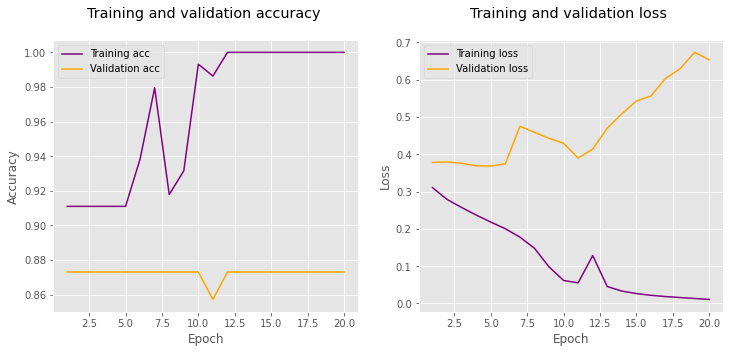

In [ ]:
history = question_RNN_model.fit(x_train_RNN, y_train, epochs=20, verbose = False,
                                           validation_data=(x_test_RNN, y_test), 
                                           batch_size=128)

plot_history(history)

# Bidirectional LSTM - Rajvi


In [ ]:
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import ast
import os
import json
import matplotlib.pyplot as plt
from nltk import tokenize
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
df_cleaned = df[['line','saved']]
df_cleaned["saved"] = (df_cleaned["saved"]*1).fillna("1").astype('float32')

df_cleaned

,line,saved
0,"Maternal tobacco, alcohol and drug use, and ma...",0.0
1,Publicity and global branding Global branding ...,0.0
2,A debit of $395 to Advertising Expense was pos...,0.0
3,Here are some of the costs that your snowboard...,0.0
4,What is a possible scenario that would provide...,0.0
...,...,...
204,Animation 10.1 Transcription PoL3e.com/a10.1 ...,1.0
205,Growth of a plant cell is restricted by the ce...,1.0
206,"<p><img src=""http://d1q3p76q2qt5dz.cloudfront....",1.0
207,"For example, Eysenck proposed that an introver...",1.0


In [ ]:
x = df_cleaned['line'].values
y = df_cleaned['saved'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100) 

In [ ]:
x_vectorizer = CountVectorizer()
x_vectorizer.fit(x_train)
x_train_vec = x_vectorizer.transform(x_train)
x_test_vec  = x_vectorizer.transform(x_test)
x_train_vec

<146x1414 sparse matrix of type '<class 'numpy.int64'>'
	with 2793 stored elements in Compressed Sparse Row format>

In [ ]:
words=20000
max_length=100

tokenizer = Tokenizer(num_words=words)
tokenizer.fit_on_texts(x_train)
x_train_bi = tokenizer.texts_to_sequences(x_train)
x_test_bi = tokenizer.texts_to_sequences(x_test)

In [ ]:
x_train_bi = tf.keras.preprocessing.sequence.pad_sequences(x_train_bi, maxlen=max_length)
x_test_bi = tf.keras.preprocessing.sequence.pad_sequences(x_test_bi, maxlen=max_length)

In [ ]:
from keras.layers import Bidirectional

In [ ]:
word_size = len(tokenizer.word_index) + 1  
word_size
embed_size=128

model = Sequential()
model.add(Embedding(word_size, embed_size, input_shape=(x_train_bi.shape[1],)))
model.add(Bidirectional(LSTM(10, return_sequences=True)))
model.add(Bidirectional(LSTM(10)))
model.add(Dense(1))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop')

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 128)          186624    
                                                                 
 bidirectional (Bidirectiona  (None, 100, 20)          11120     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 20)               2480      
 nal)                                                            
                                                                 
 dense_3 (Dense)             (None, 1)                 21        
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 200,245
Trainable params: 200,245
Non-tr

In [ ]:
model.fit(x_train_bi, y_train, epochs=5, verbose = False,
                       validation_data = (x_test_bi, y_test), batch_size=128)

train_loss, train_accuracy = question_RNN_model.evaluate(x_train_bi, y_train, verbose = False)
print("Model Train Accuracy: {:.3f}".format(train_accuracy))
test_loss, test_acurracy = question_RNN_model.evaluate(x_test_bi, y_test, verbose = False)
print("Model Test accuracy: {:.3f}".format(test_acurracy))

Model Train Accuracy: 0.884
Model Test accuracy: 0.873


# SME

In [ ]:
df['saved'] = df['saved'].fillna(value='true')

In [ ]:
c = df['saved'].value_counts()
c = pd.DataFrame(c)
c

,saved
False,188
true,21


In [ ]:
grouped = df.groupby(df.saved)
df_true = grouped.get_group("true")
df_true

,Unnamed: 0,book_id,book_name,chapters.chapter_name,chapters.chapter_content,question,choices,answer,line,showContext,...,chapters.example_question_saved_count,chapters.keyphrase_question_nonsaved_count,chapters.example_nonsaved_count,y,comp-1,comp-2,line_len,word_count,cleanedLine,processedLine
188,58160,134,Hockenbury Psychology,Chapter 15 Therapies,NaN,Exposure therapy that focuses on habituation r...,"['observational learning', 'inhibitory learnin...",Inhibitory Learning,Exposure therapy that focuses on habituation r...,<p><b>Excerpt from Chapter: Chapter 15 Therapi...,...,34,136,130,Hockenbury Psychology,151.630157,-98.593758,274,41,exposure therapy that focuses on habituation r...,"[exposure, therapy, focuses, habituation, rath..."
189,69857,133,principle of life,Chapter 21 The Evolution and Diversity of Fungi,NaN,"In mushroom-forming club fungi, the basidia ty...","['Soredia', 'Conidia', 'mating types', 'Zygosp...",Basidiomata,"In mushroom-forming club fungi, the basidia ty...",<p><b>Excerpt from Chapter: Chapter 21 The Evo...,...,55,341,56,principle of life,193.173904,2.711045,119,17,in mushroomforming club fungi the basidia typi...,"[mushroomforming, club, fungi, basidia, typica..."
190,40265,130,Business Studies Preliminary 7e,Role of human resource management,NaN,Although there are many successful examples of...,"['Process outsourcing', 'Domestic subcontracti...",contractors,Although there are many successful examples of...,<p><b>Excerpt from Chapter: Role of human reso...,...,8,68,10,Business Studies Preliminary 7e,149.104218,147.097397,148,22,although there are many successful examples of...,"[although, many, successful, examples, outsour..."
191,74264,133,principle of life,Chapter 29 Animals in Their Environments,NaN,Circannual clocks are known to control annual ...,"['regional hypothermia', 'countercurrent heat ...",Hibernation,Circannual clocks are known to control annual ...,<p><b>Excerpt from Chapter: Chapter 29 Animals...,...,39,106,67,principle of life,162.729553,32.739674,170,26,circannual clocks are known to control annual ...,"[circannual, clocks, known, control, annual, h..."
192,41177,130,Business Studies Preliminary 7e,Processes of human resource management,NaN,A strategic approach to human resource managem...,"['Employee selection', 'Recruitment', 'Acquisi...",acquisition,A strategic approach to human resource managem...,<p><b>Excerpt from Chapter: Processes of human...,...,27,227,15,Business Studies Preliminary 7e,154.221054,103.018082,226,33,a strategic approach to human resource managem...,"[strategic, approach, human, resource, managem..."
193,1386,120,Accounts,Chapter 2: A Further Look at Financial Statements,NaN,Principles in Financial Reporting Measurement...,"['Apple Inc', 'Answers To Ifrs Self-Test Quest...",Fair Value Principle,Principles in Financial Reporting Measurement...,<p><b>Excerpt from Chapter: Chapter 2: A Furth...,...,21,656,0,Accounts,-185.802414,-28.544687,171,23,principles in financial reporting measurement...,"[principles, financial, reporting, measurement..."
194,63107,133,principle of life,Chapter 7 The Cell Cycle and Cell Division,NaN,A dividing cell first grows in size and replic...,"['Crossing Over', 'necrosis', 'Meiosis', 'cell...",binary fission,A dividing cell first grows in size and replic...,<p><b>Excerpt from Chapter: Chapter 7 The Cell...,...,26,963,141,principle of life,-24.122713,-133.847580,191,36,a dividing cell first grows in size and replic...,"[dividing, cell, first, grows, size, replicate..."
195,60242,133,principle of life,Chapter 3 Macromolecules,NaN,When the concentration of the competitive inhi...,"['Ligand', 'Substrates', 'active site', 'Inhib...",Active Site,When the concentration of the competitive inhi...,<p><b>Excerpt from Chapter: Chapter 3 Macromol...,...,61,707,274,principle of life,66.831573,-203.623016,160,26,when the concentration of the competitive inhi...,"[concentration, competitive, inhibitor, reduce..."
196,83071,133,principle of life,C

In [ ]:
#df.drop('Unnamed: 0', axis=1, inplace=True)

df_true = df_true[~df_true['line'].isnull()]

def preprocess(ReviewText):
    ReviewText = ReviewText.str.replace("(<br/>)", "", regex=True)
    ReviewText = ReviewText.str.replace('(<a).*(>).*(</a>)', '',regex=True)
    ReviewText = ReviewText.str.replace('(&amp)', '',regex=True)
    ReviewText = ReviewText.str.replace('(&gt)', '',regex=True)
    ReviewText = ReviewText.str.replace('(&lt)', '',regex=True)
    ReviewText = ReviewText.str.replace('(\xa0)', ' ',regex=True)  
    return ReviewText
df_true['line'] = preprocess(df_true['line'])

df_true['line_len'] = df_true['line'].astype(str).apply(len)
df_true['word_count'] = df_true['line'].apply(lambda x: len(str(x).split()))

(array([1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 2., 1., 1., 0., 0., 0., 0.,
        2., 0., 0., 2., 1., 1., 2., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1.,
        0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([ 79. ,  82.9,  86.8,  90.7,  94.6,  98.5, 102.4, 106.3, 110.2,
        114.1, 118. , 121.9, 125.8, 129.7, 133.6, 137.5, 141.4, 145.3,
        149.2, 153.1, 157. , 160.9, 164.8, 168.7, 172.6, 176.5, 180.4,
        184.3, 188.2, 192.1, 196. , 199.9, 203.8, 207.7, 211.6, 215.5,
        219.4, 223.3, 227.2, 231.1, 235. , 238.9, 242.8, 246.7, 250.6,
        254.5, 258.4, 262.3, 266.2, 270.1, 274. ]),
 <a list of 50 Patch objects>)

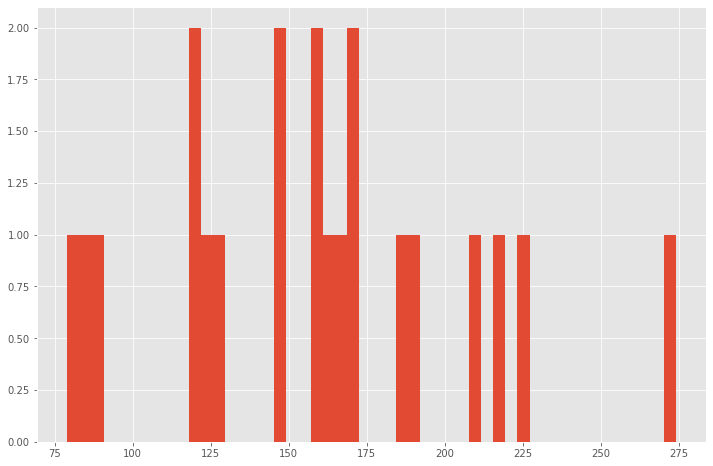

In [ ]:
# The distribution text lengths
plt.hist(df_true.line_len,bins=50)

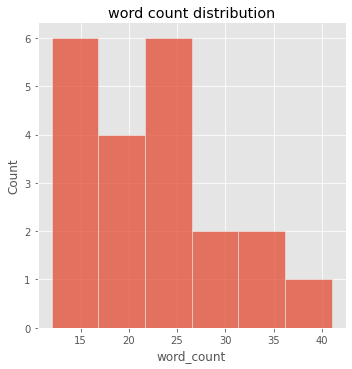

In [ ]:
# The distribution of word count
sns.displot(df_true, x="word_count").set(title='word count distribution')

In [ ]:
grouped = df.groupby(df.saved)
df_false = grouped.get_group(False)
df_false

,Unnamed: 0,book_id,book_name,chapters.chapter_name,chapters.chapter_content,question,choices,answer,line,showContext,...,chapters.example_question_saved_count,chapters.keyphrase_question_nonsaved_count,chapters.example_nonsaved_count,y,comp-1,comp-2,line_len,word_count,cleanedLine,processedLine
0,45437,121,Health and Human Development Units 3 and 4,c04 Variations In Health Status Population Groups,NaN,"Maternal tobacco, alcohol and drug use, and ma...","['Rural Areas', 'America', 'The United Nations...",Pregnancy,"Maternal tobacco, alcohol and drug use, and ma...","\nPage 141 Every person is, in part, a product...",...,27,985,154,Health and Human Development Units 3 and 4,-51.945511,-180.321045,219,32,maternal tobacco alcohol and drug use and mate...,"[maternal, tobacco, alcohol, drug, use, matern..."
1,37718,130,Business Studies Preliminary 7e,Marketing strategies,NaN,Publicity and _____________ _____________ ...,"['Global marketing', 'transnational corporatio...",Global Branding,Publicity and global branding Global branding ...,content not found,...,34,1038,230,Business Studies Preliminary 7e,1.280442,-180.999954,293,43,publicity and global branding global branding ...,"[publicity, global, branding, global, branding..."
2,3195,120,Accounts,Chapter 3: The Accounting Information System,NaN,A debit of $395 to _____________ was posted ...,"['The General Ledger', 'Service Revenue', 'Tem...",Advertising Expense,A debit of $395 to Advertising Expense was pos...,content not found,...,22,1060,0,Accounts,-186.369766,31.377338,58,11,a debit of 395 to advertising expense was post...,"[debit, 395, advertising, expense, posted, 359]"
3,17640,120,Accounts,Chapter 14 Managerial Accounting,NaN,Here are some of the costs that your snowboard...,"['Illinois', 'Wisconsin', 'State Of Illinois',...",Terrain,Here are some of the costs that your snowboard...,\nTo improve your understanding of cost concep...,...,30,727,5,Accounts,-95.865196,21.499971,89,15,here are some of the costs that your snowboard...,"[costs, snowboard, factory, terrain, park, boa..."
4,28350,120,Accounts,Chapter 24 Standard Costs and Balanced Scorecard,NaN,What is a possible scenario that would provide...,"['Computation Of Cost Of Delivery Truck', 'Whe...",Unfavorable,What is a possible scenario that would provide...,content not found,...,27,1586,13,Accounts,-202.478989,139.885666,135,22,what is a possible scenario that would provide...,"[possible, scenario, would, provide, one, caus..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,19960,120,Accounts,Chapter 16 Process Costing,NaN,Process Cost Flow Illustration 16.5 shows ___...,"['Accumulates', 'Assigned', 'Factory Labor', ...",The Flow Of Costs,Process Cost Flow Illustration 16.5 shows the ...,content not found,...,26,1513,26,Accounts,-203.044037,170.223618,105,18,process cost flow illustration 165 shows the f...,"[process, cost, flow, illustration, 165, shows..."
184,67425,133,principle of life,Chapter 16 Speciation,NaN,Questions What examples of geographic events a...,"['Speciation', 'Species', 'species concepts', ...",Species,Questions What examples of geographic events...,content not found,...,32,439,106,principle of life,61.369808,-16.366976,150,21,questions what examples of geographic events...,"[questions, examples, geographic, events, like..."
185,48547,121,Health and Human Development Units 3 and 4,c09 Sustainability And Human Development,NaN,What does it mean when the three dimensions of...,"['Who Gives A Crap', 'Sourced', 'Sustainable D...",Sustainability,What does it mean when the three dimensions of...,\nOutline the four factors that are important ...,...,7,237,73,Health and Human Development Units 3 and 4,105.412415,126.452812,90,15,what does it mean when the three dimensions of...,"[mean, three, dimensions, sustainability, said..."
186,52078,134,Hockenbury Psychology,Chapter 4 Consciousness and Its Variations,NaN,People who go without sleep for a day or more ...,"

In [ ]:
#df.drop('Unnamed: 0', axis=1, inplace=True)

df_false = df_false[~df_false['line'].isnull()]

def preprocess(ReviewText):
    ReviewText = ReviewText.str.replace("(<br/>)", "", regex=True)
    ReviewText = ReviewText.str.replace('(<a).*(>).*(</a>)', '',regex=True)
    ReviewText = ReviewText.str.replace('(&amp)', '',regex=True)
    ReviewText = ReviewText.str.replace('(&gt)', '',regex=True)
    ReviewText = ReviewText.str.replace('(&lt)', '',regex=True)
    ReviewText = ReviewText.str.replace('(\xa0)', ' ',regex=True)  
    return ReviewText
df_false['line'] = preprocess(df_false['line'])

df_false['line_len'] = df_false['line'].astype(str).apply(len)
df_false['word_count'] = df_false['line'].apply(lambda x: len(str(x).split()))

(array([ 6.,  6.,  4.,  7.,  5., 10., 17.,  8., 14.,  6., 10.,  6.,  5.,
        13.,  4.,  7.,  9.,  7.,  9.,  3.,  6.,  5.,  5.,  3.,  0.,  2.,
         4.,  0.,  0.,  1.,  0.,  2.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 40.  ,  48.04,  56.08,  64.12,  72.16,  80.2 ,  88.24,  96.28,
        104.32, 112.36, 120.4 , 128.44, 136.48, 144.52, 152.56, 160.6 ,
        168.64, 176.68, 184.72, 192.76, 200.8 , 208.84, 216.88, 224.92,
        232.96, 241.  , 249.04, 257.08, 265.12, 273.16, 281.2 , 289.24,
        297.28, 305.32, 313.36, 321.4 , 329.44, 337.48, 345.52, 353.56,
        361.6 , 369.64, 377.68, 385.72, 393.76, 401.8 , 409.84, 417.88,
        425.92, 433.96, 442.  ]),
 <a list of 50 Patch objects>)

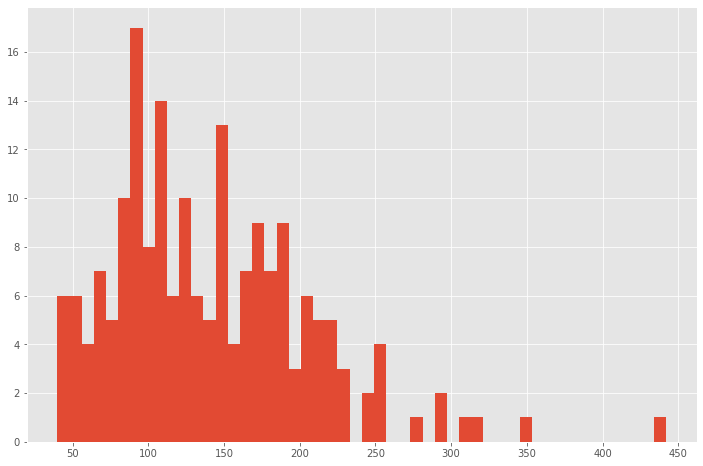

In [ ]:
# The distribution text lengths
plt.hist(df_false.line_len,bins=50)

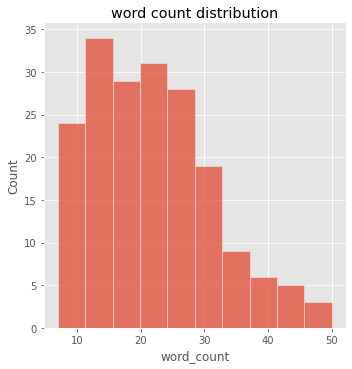

In [ ]:
# The distribution of word count
sns.displot(df_false, x="word_count").set(title='word count distribution')

#SME common words - true


In [ ]:
# remove punctuation
def remove_punc(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

df_true['cleanedLine'] = df_true['line'].apply(remove_punc)

In [ ]:
# further pre-processing
def preprocess(text):
    text = text.str.replace('(&amp)', '',regex=True)
    text = text.str.replace('(&gt)', '',regex=True)    
    text = text.str.replace("(<br/>)", "",regex=True)
    text = text.str.replace('(<a).*(>).*(</a>)', '',regex=True)
    text = text.str.replace('(&lt)', '', regex=True)
    text = text.str.replace('(\xa0)', ' ', regex=True)  
    return text


df_true['cleanedLine'] = preprocess(df_true['cleanedLine'])

In [ ]:
# lower case
df_true['cleanedLine'] = df_true['cleanedLine'].apply(lambda x:str(x).lower())

In [ ]:
# create corpus of stopwords
corpus=[]
line = df_true['cleanedLine'].str.split()
line = line.values.tolist()
corpus=[word for i in line for word in i]

from collections import defaultdict
dic = defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

In [ ]:
# split into tokens
df_true['processedLine'] =df_true['cleanedLine'].apply(lambda x:word_tokenize(x))

In [ ]:
# remove stopwords
def remove_stopword(context):
    return [word for word in context if word not in stopwords.words('english')]

df_true['processedLine'] = df_true['processedLine'].apply(lambda x:remove_stopword(x))

In [ ]:
# inspect words with top occurency AFTER removing stopwords

top = Counter([item for sublist in df_true['processedLine'] for item in sublist])
top_temp = pd.DataFrame(top.most_common(20))
top_temp.columns = ['top_words','count']
top_temp.style.background_gradient(cmap='crest')

,top_words,count
0,’,7
1,species,6
2,cell,4
3,figure,4
4,human,3
5,principles,3
6,development,3
7,exposure,2
8,learning,2
9,may,2


Text(0.5, 1.0, 'Most Frequent Trigrams Among Question \n')

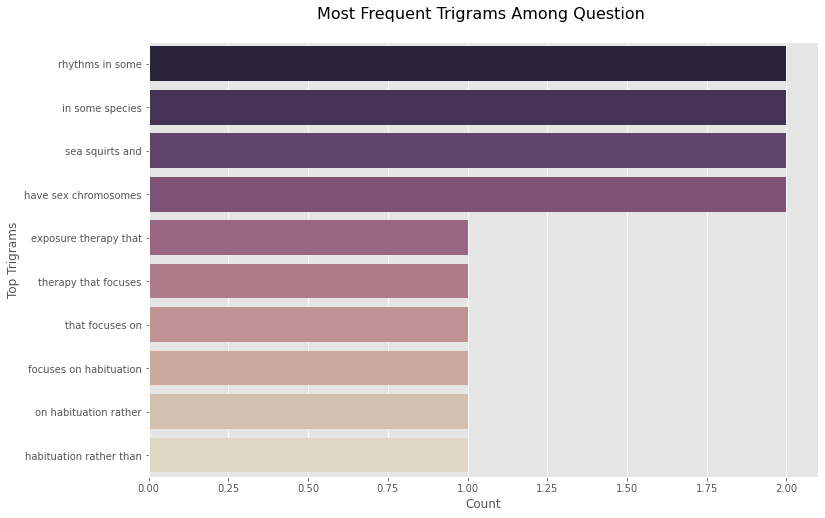

In [ ]:
# plot top trigrams

rcParams['figure.figsize'] = 12,8
top_trigram = plot_top_ngrams(df_true['cleanedLine'],3)

def show_value_on_bars(top_trigram, space=0.4):
        for p in ax.patches:
            _x = p.get_x() + p.get_width() + float(space)
            _y = p.get_y() + p.get_height() / 1.4
            value = int(p.get_width())
            ax.text(_x, _y, value, ha="center")

show_value_on_bars(ax, 0.4)

plt.xlabel('Count', size=12)
plt.ylabel('Top Trigrams', size = 12)
plt.title('Most Frequent Trigrams Among Question \n', size=16)

# SME common words - false

In [ ]:
# remove punctuation
def remove_punc(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

df_false['cleanedLine'] = df_false['line'].apply(remove_punc)

In [ ]:
# further pre-processing
def preprocess(text):
    text = text.str.replace('(&amp)', '',regex=True)
    text = text.str.replace('(&gt)', '',regex=True)    
    text = text.str.replace("(<br/>)", "",regex=True)
    text = text.str.replace('(<a).*(>).*(</a>)', '',regex=True)
    text = text.str.replace('(&lt)', '', regex=True)
    text = text.str.replace('(\xa0)', ' ', regex=True)  
    return text


df_false['cleanedLine'] = preprocess(df_false['cleanedLine'])

In [ ]:
# lower case
df_false['cleanedLine'] = df_false['cleanedLine'].apply(lambda x:str(x).lower())

In [ ]:
# create corpus of stopwords
corpus=[]
line = df_false['cleanedLine'].str.split()
line = line.values.tolist()
corpus=[word for i in line for word in i]

from collections import defaultdict
dic = defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

In [ ]:
# split into tokens
df_false['processedLine'] =df_false['cleanedLine'].apply(lambda x:word_tokenize(x))

In [ ]:
# remove stopwords
def remove_stopword(context):
    return [word for word in context if word not in stopwords.words('english')]

df_false['processedLine'] = df_false['processedLine'].apply(lambda x:remove_stopword(x))

In [ ]:
# inspect words with top occurency AFTER removing stopwords

top = Counter([item for sublist in df_false['processedLine'] for item in sublist])
top_temp = pd.DataFrame(top.most_common(20))
top_temp.columns = ['top_words','count']
top_temp.style.background_gradient(cmap='crest')

,top_words,count
0,cash,26
1,figure,15
2,cost,13
3,costs,12
4,accounts,12
5,expense,10
6,two,10
7,income,10
8,system,10
9,2,10


Text(0.5, 1.0, 'Most Frequent Trigrams Among Question \n')

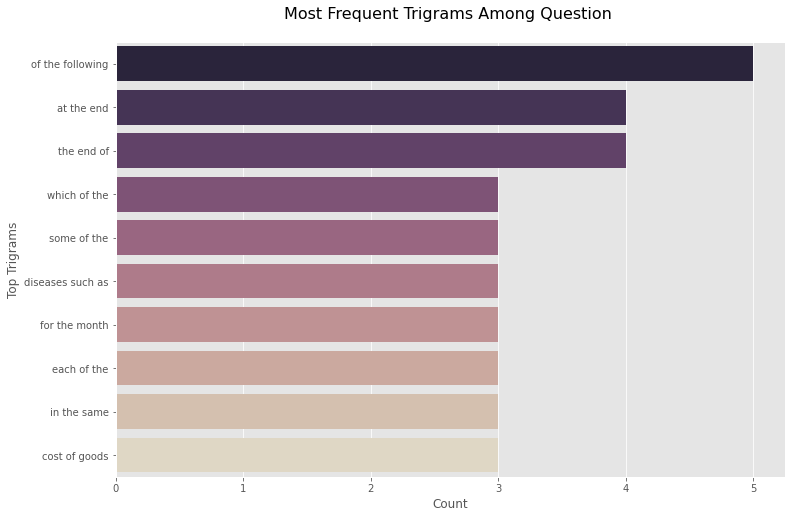

In [ ]:
# plot top trigrams

rcParams['figure.figsize'] = 12,8
top_trigram = plot_top_ngrams(df_false['cleanedLine'],3)

def show_value_on_bars(top_trigram, space=0.4):
        for p in ax.patches:
            _x = p.get_x() + p.get_width() + float(space)
            _y = p.get_y() + p.get_height() / 1.4
            value = int(p.get_width())
            ax.text(_x, _y, value, ha="center")

show_value_on_bars(ax, 0.4)

plt.xlabel('Count', size=12)
plt.ylabel('Top Trigrams', size = 12)
plt.title('Most Frequent Trigrams Among Question \n', size=16)